In [26]:
# Problem Statement: 
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
# Perform following tasks:
# 1. Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [27]:
# Import the packages

In [28]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [29]:
# 1. Preprocess the dataset

In [30]:
# Read the csv and remove null records

In [31]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [32]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [33]:
df = df.dropna(axis = 0, how = 'any')
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [34]:
# 2. Identify Outliers

In [35]:
# Identify and Remove Outliers

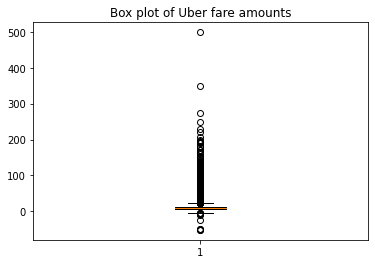

In [36]:
plt.boxplot(df['fare_amount'])
plt.title('Box plot of Uber fare amounts')
plt.show()

Unnamed: 0              Axes(0.125,0.787927;0.352273x0.0920732)
fare_amount          Axes(0.547727,0.787927;0.352273x0.0920732)
pickup_longitude        Axes(0.125,0.677439;0.352273x0.0920732)
pickup_latitude      Axes(0.547727,0.677439;0.352273x0.0920732)
dropoff_longitude       Axes(0.125,0.566951;0.352273x0.0920732)
dropoff_latitude     Axes(0.547727,0.566951;0.352273x0.0920732)
passenger_count         Axes(0.125,0.456463;0.352273x0.0920732)
dtype: object

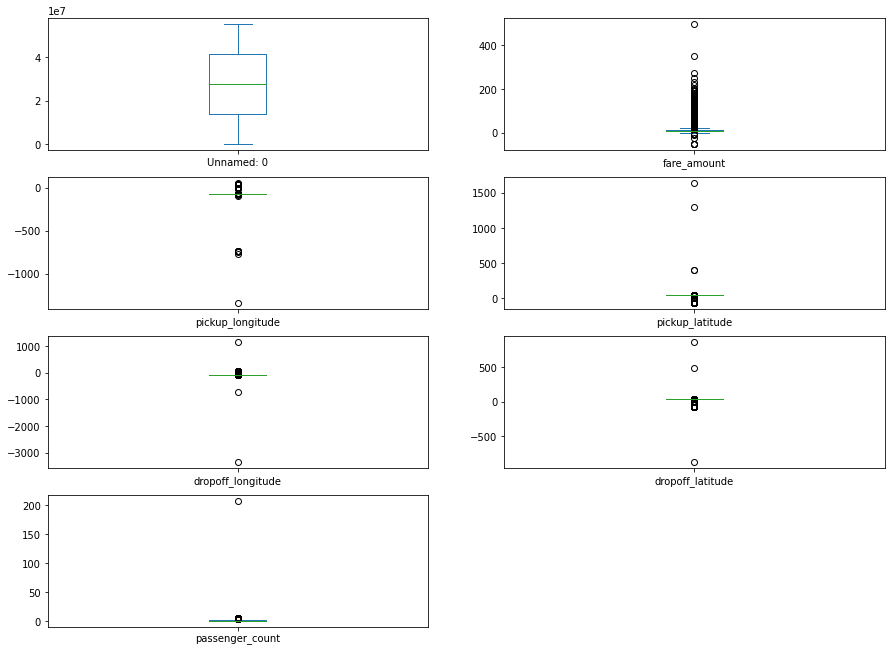

In [37]:
df.plot(kind = 'box', subplots = True, layout = (7, 2), figsize = (15, 20))

In [38]:
Q1 = np.percentile(df['fare_amount'], 25)
Q3 = np.percentile(df['fare_amount'], 75)
IQR = Q3-Q1
IQR

6.5

In [39]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = ((df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound))

In [40]:
print('Identified Outliers:')
df[outliers]

Identified Outliers:


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
6,48725865,2014-10-12 07:04:00.0000002,24.50,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
30,31945670,2011-05-21 09:00:00.00000031,25.70,2011-05-21 09:00:00 UTC,-73.944815,40.834367,-73.989332,40.721920,4
34,19277743,2014-06-04 06:49:00.000000102,39.50,2014-06-04 06:49:00 UTC,-73.788080,40.642187,-73.865042,40.725997,4
39,38703737,2014-02-13 17:57:00.000000102,29.00,2014-02-13 17:57:00 UTC,-73.992600,40.753172,-73.908508,40.816192,1
48,22405517,2013-01-03 22:24:41.0000002,56.80,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1
...,...,...,...,...,...,...,...,...,...
199976,1780041,2011-10-18 23:53:00.000000145,49.70,2011-10-18 23:53:00 UTC,-73.978225,40.783318,-73.700963,40.705852,1
199977,21117828,2012-11-20 21:04:30.0000001,43.50,2012-11-20 21:04:30 UTC,-73.996671,40.737483,-73.867758,40.897563,1
199982,13096190,2014-08-06 11:06:06.0000001,57.33,2014-08-06 11:06:06 UTC,-73.969204,40.754771,-73.790351,40.643802,1
199985,25830754,2015-04-18 15:16:06.0000005,24.00,2015-04-18 15:16:06 UTC,-74.005089,40.737301,-73.945290,40.774162,5


In [41]:
df = df[~outliers]

In [42]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


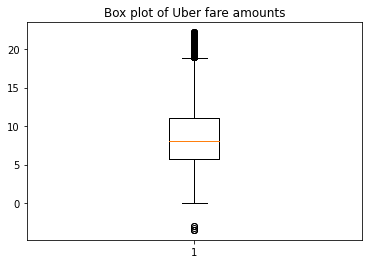

In [43]:
plt.boxplot(df['fare_amount'])
plt.title('Box plot of Uber fare amounts')
plt.show()

Unnamed: 0              Axes(0.125,0.787927;0.352273x0.0920732)
fare_amount          Axes(0.547727,0.787927;0.352273x0.0920732)
pickup_longitude        Axes(0.125,0.677439;0.352273x0.0920732)
pickup_latitude      Axes(0.547727,0.677439;0.352273x0.0920732)
dropoff_longitude       Axes(0.125,0.566951;0.352273x0.0920732)
dropoff_latitude     Axes(0.547727,0.566951;0.352273x0.0920732)
passenger_count         Axes(0.125,0.456463;0.352273x0.0920732)
dtype: object

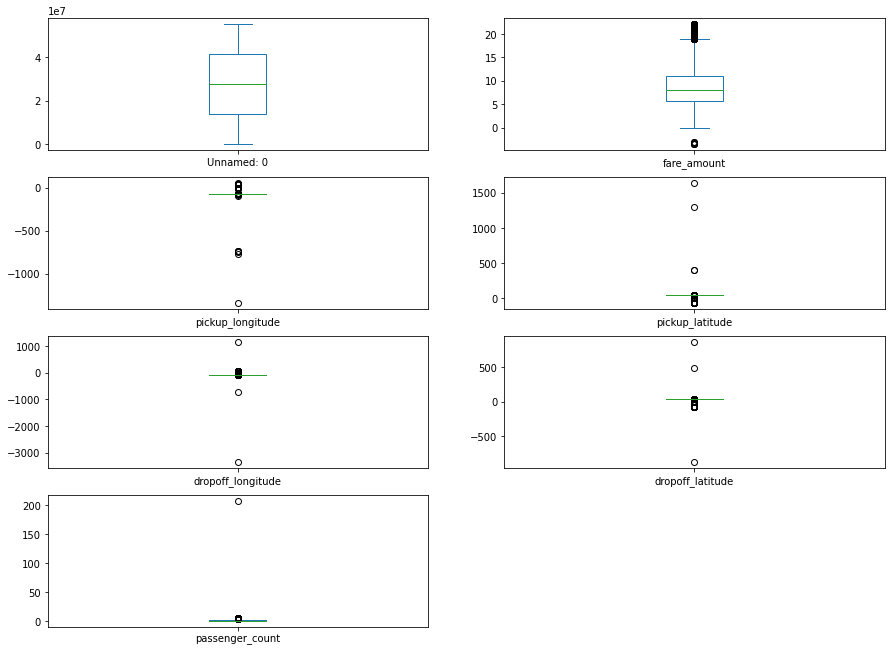

In [44]:
df.plot(kind = 'box', subplots = True, layout = (7, 2), figsize = (15, 20))

In [45]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [46]:
for feature in df.columns:
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = ((df[feature] < lower_bound) | (df[feature] > upper_bound))
    
    df = df[~outliers]

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U27'), dtype('<U29')) -> None

Unnamed: 0              Axes(0.125,0.787927;0.352273x0.0920732)
fare_amount          Axes(0.547727,0.787927;0.352273x0.0920732)
pickup_longitude        Axes(0.125,0.677439;0.352273x0.0920732)
pickup_latitude      Axes(0.547727,0.677439;0.352273x0.0920732)
dropoff_longitude       Axes(0.125,0.566951;0.352273x0.0920732)
dropoff_latitude     Axes(0.547727,0.566951;0.352273x0.0920732)
passenger_count         Axes(0.125,0.456463;0.352273x0.0920732)
dtype: object

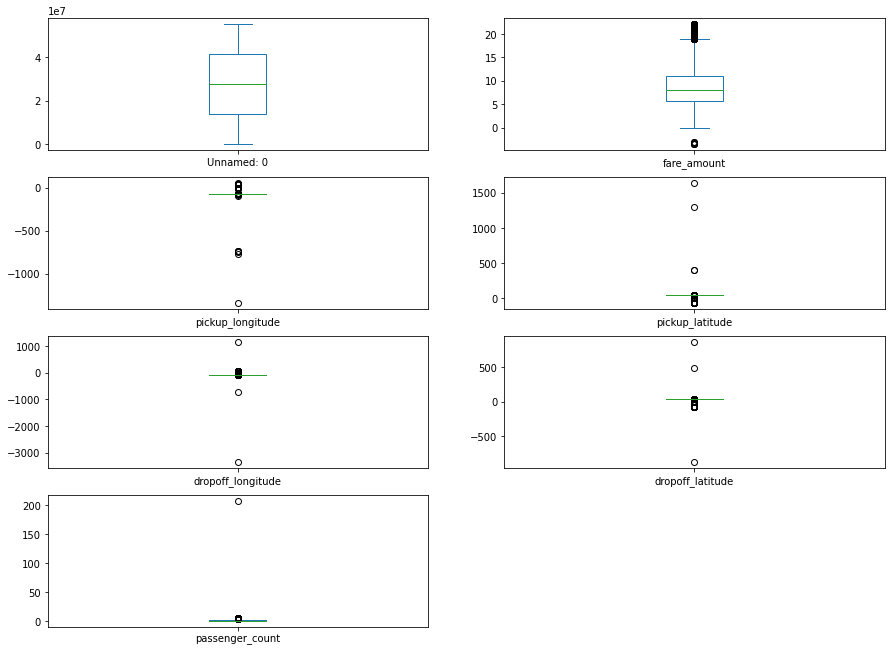

In [47]:
df.plot(kind = 'box', subplots = True, layout = (7, 2), figsize = (15, 20))

In [48]:
# 3. Check Correlation
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [49]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)
df = df.drop(['pickup_datetime'], axis = 1)

In [50]:
correlation_matrix = df.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.000367,0.002618,-0.002413,0.000589,0.012618
pickup_longitude,0.000367,1.000000,-0.812047,0.835950,-0.850574,-0.000751
pickup_latitude,0.002618,-0.812047,1.000000,-0.767103,0.684558,-0.001604
dropoff_longitude,-0.002413,0.835950,-0.767103,1.000000,-0.913949,0.000203
dropoff_latitude,0.000589,-0.850574,0.684558,-0.913949,1.000000,-0.000853
passenger_count,0.012618,-0.000751,-0.001604,0.000203,-0.000853,1.000000


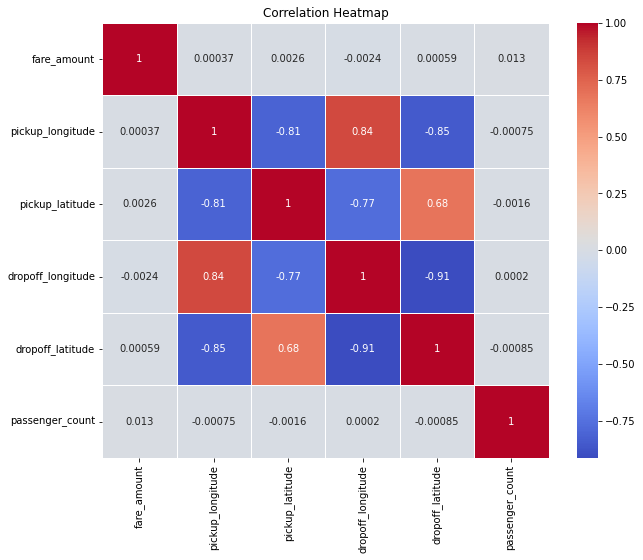

In [51]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [52]:
# 4. Implement Linear Regression and Random forest regression models

In [53]:
import sklearn as skl
from sklearn.model_selection import train_test_split

In [54]:
target_variable = 'fare_amount'

In [55]:
X = df.drop(target_variable, axis = 1)
y = df[target_variable]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=45)

In [57]:
# Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_model = LinearRegression()

In [60]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred_linear = linear_model.predict(X_test)

In [62]:
# Random forest 

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf_model = RandomForestRegressor(n_estimators=100, random_state = 5)

In [65]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=5)

In [44]:
y_pred_rf = rf_model.predict(X_test)

In [37]:
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
# Peformance Evaluation of Linear Regression Model

In [40]:
r2_linear_reg = r2_score(y_true=y_test, y_pred=y_pred_linear)
rmse_linear_reg = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_linear))
mae_linear_reg = mean_absolute_error(y_true=y_test, y_pred=y_pred_linear)

In [41]:
print('Evaluation metrics for Linear Regression')
print('R2 score = ', r2_linear_reg)
print('RMSE = ', rmse_linear_reg)
print('MAE = ', mae_linear_reg)

Evaluation metrics for Linear Regression
R2 score =  -0.00031243287204474335
RMSE =  4.163020074857872
MAE =  3.2962095800169435


In [42]:
# Performance Evaluation of Random Forest Model

In [45]:
r2_rf = r2_score(y_true=y_test, y_pred=y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_rf))
mae_rf = mean_absolute_error(y_true=y_test, y_pred=y_pred_rf)

In [46]:
print('Evaluation metrics for Random Forest')
print('R2 score = ', r2_rf)
print('RMSE = ', rmse_rf)
print('MAE = ', mae_rf)

Evaluation metrics for Random Forest
R2 score =  0.7048565642190932
RMSE =  2.261295071081786
MAE =  1.580828425373776
